In [1]:
# Artificial Neural Network
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head(2)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [2]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['state'] = labelencoder.fit_transform(df['state'])
df['international plan'] = labelencoder.fit_transform(df['international plan'])
df['voice mail plan'] = labelencoder.fit_transform(df['voice mail plan'])
df['churn'] = labelencoder.fit_transform(df['churn'])
df.drop(["phone number"],axis = 1, inplace = True)
#df.head(5)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
state                     3333 non-null int32
account length            3333 non-null int64
area code                 3333 non-null int64
international plan        3333 non-null int32
voice mail plan           3333 non-null int32
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64
customer service calls    3333 non-null int64
chu

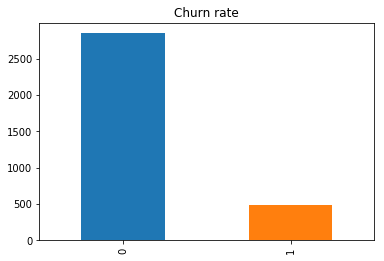

In [4]:
df["churn"].value_counts().plot.bar(title= 'Churn rate')

In [18]:
df['churn'] = False

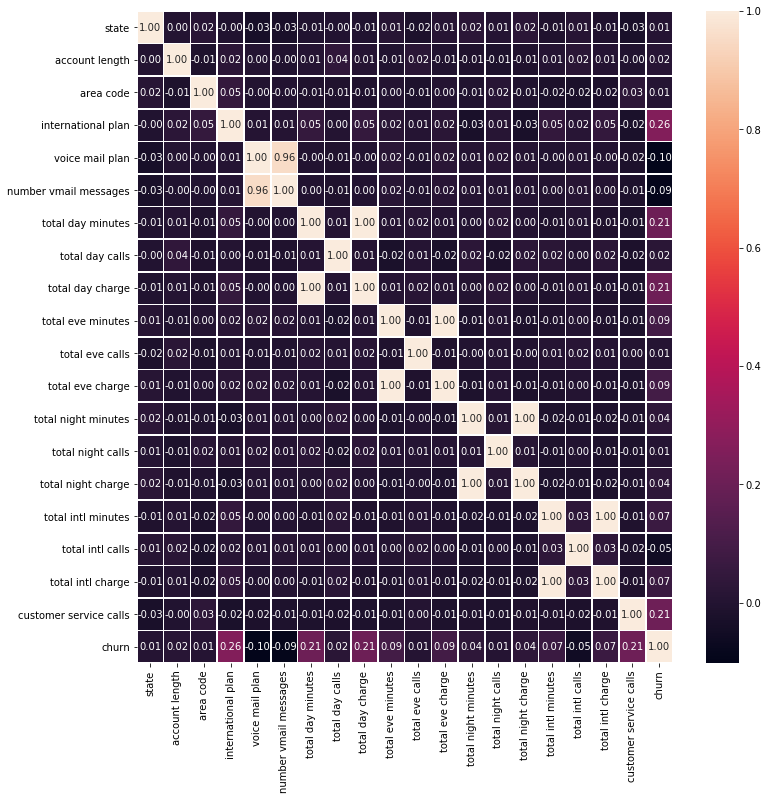

In [5]:
#Correlation heatmap
import seaborn as sns
f,ax= plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidths=.6,fmt='.2f',ax=ax) #annot=True :Visible numbers 
plt.show() 

In [6]:
#Select attributes for training
#X = df.iloc[:,[3,6,7,8,9,10,11,12,13,14,15,17,18]].values
X = df.iloc[:,1:19].values
y = df.iloc[:,19].values
X[0]

array([128.  , 415.  ,   0.  ,   1.  ,  25.  , 265.1 , 110.  ,  45.07,
       197.4 ,  99.  ,  16.78, 244.7 ,  91.  ,  11.01,  10.  ,   3.  ,
         2.7 ,   1.  ])

In [7]:
#preprocessing convert null data to mean colums at corresponding colums 
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean',axis = 0)
imp.fit(X)
X= imp.fit_transform(X)
X[0]

F:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([128.  , 415.  ,   0.  ,   1.  ,  25.  , 265.1 , 110.  ,  45.07,
       197.4 ,  99.  ,  16.78, 244.7 ,  91.  ,  11.01,  10.  ,   3.  ,
         2.7 ,   1.  ])

In [8]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [10]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0, ratio = 1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [11]:
#data labels before SMOTE:
import collections
collections.Counter(y_train)

Counter({0: 2271, 1: 395})

In [12]:
#after SMOTE:
import collections
collections.Counter(y_train_res)

Counter({0: 2271, 1: 2271})

In [13]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [67]:
n_input = X_train_res.shape[1]

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 5, init = 'uniform', activation = 'relu', input_dim = (n_input)))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 3, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train_res, y_train_res, batch_size = 20, nb_epoch = 1000)
# evaluate the model on training
scores = classifier.evaluate(X_train_res, y_train_res)
print("\n%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))
#structure model
classifier.summary()


F:\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=18, units=5, kernel_initializer="uniform")`
  import sys
F:\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=3, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
F:\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  del sys.path[0]
F:\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:19: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/1000
4542/4542 [==============================] - 4s 832us/step - loss: 0.6711 - acc: 0.7250
Epoch 2/1000
4542/4542 [==============================] - 1s 214us/step - loss: 0.5223 - acc: 0.7900
Epoch 3/1000
4542/4542 [==============================] - 1s 166us/step - loss: 0.4220 - acc: 0.8437
Epoch 4/1000
4542/4542 [==============================] - 1s 175us/step - loss: 0.3766 - acc: 0.8646
Epoch 5/1000
4542/4542 [==============================] - 1s 175us/step - loss: 0.3555 - acc: 0.8708
Epoch 6/1000
4542/4542 [==============================] - 1s 164us/step - loss: 0.3451 - acc: 0.8736
Epoch 7/1000
4542/4542 [==============================] - 1s 165us/step - loss: 0.3388 - acc: 0.8758
Epoch 8/1000
4542/4542 [==============================] - 1s 166us/step - loss: 0.3341 - acc: 0.8793
Epoch 9/1000
4542/4542 [==============================] - 1s 165us/step - loss: 0.3300 - acc: 0.8822
Epoch 10/1000
4542/4542 [==============================] - 1s 163us/step - loss: 0.3266 - a

4542/4542 [==============================] - 1s 166us/step - loss: 0.2517 - acc: 0.9135
Epoch 161/1000
4542/4542 [==============================] - 1s 165us/step - loss: 0.2521 - acc: 0.9117
Epoch 162/1000
4542/4542 [==============================] - 1s 163us/step - loss: 0.2522 - acc: 0.9128
Epoch 163/1000
4542/4542 [==============================] - 1s 164us/step - loss: 0.2526 - acc: 0.9124
Epoch 164/1000
4542/4542 [==============================] - 1s 161us/step - loss: 0.2507 - acc: 0.9133
Epoch 165/1000
4542/4542 [==============================] - 1s 166us/step - loss: 0.2512 - acc: 0.9137
Epoch 166/1000
4542/4542 [==============================] - 1s 164us/step - loss: 0.2519 - acc: 0.9133
Epoch 167/1000
4542/4542 [==============================] - 1s 163us/step - loss: 0.2512 - acc: 0.9124
Epoch 168/1000
4542/4542 [==============================] - 1s 163us/step - loss: 0.2517 - acc: 0.9119
Epoch 169/1000
4542/4542 [==============================] - 1s 164us/step - loss: 0.2516

4542/4542 [==============================] - 1s 195us/step - loss: 0.2486 - acc: 0.9144
Epoch 318/1000
4542/4542 [==============================] - 1s 163us/step - loss: 0.2475 - acc: 0.9141
Epoch 319/1000
4542/4542 [==============================] - 1s 168us/step - loss: 0.2483 - acc: 0.9159
Epoch 320/1000
4542/4542 [==============================] - 1s 166us/step - loss: 0.2467 - acc: 0.9157
Epoch 321/1000
4542/4542 [==============================] - 1s 162us/step - loss: 0.2491 - acc: 0.9146
Epoch 322/1000
4542/4542 [==============================] - 1s 163us/step - loss: 0.2481 - acc: 0.9141
Epoch 323/1000
4542/4542 [==============================] - 1s 164us/step - loss: 0.2479 - acc: 0.9148
Epoch 324/1000
4542/4542 [==============================] - 1s 233us/step - loss: 0.2494 - acc: 0.9144
Epoch 325/1000
4542/4542 [==============================] - 1s 205us/step - loss: 0.2479 - acc: 0.9139
Epoch 326/1000
4542/4542 [==============================] - 1s 167us/step - loss: 0.2482

4542/4542 [==============================] - 1s 164us/step - loss: 0.2459 - acc: 0.9152
Epoch 476/1000
4542/4542 [==============================] - 1s 162us/step - loss: 0.2454 - acc: 0.9174
Epoch 477/1000
4542/4542 [==============================] - 1s 162us/step - loss: 0.2461 - acc: 0.9161
Epoch 478/1000
4542/4542 [==============================] - 1s 164us/step - loss: 0.2456 - acc: 0.9155
Epoch 479/1000
4542/4542 [==============================] - 1s 164us/step - loss: 0.2448 - acc: 0.9157
Epoch 480/1000
4542/4542 [==============================] - 1s 176us/step - loss: 0.2446 - acc: 0.9174
Epoch 481/1000
4542/4542 [==============================] - 1s 167us/step - loss: 0.2465 - acc: 0.9163
Epoch 482/1000
4542/4542 [==============================] - 1s 166us/step - loss: 0.2458 - acc: 0.9157
Epoch 483/1000
4542/4542 [==============================] - 1s 176us/step - loss: 0.2460 - acc: 0.9168
Epoch 484/1000
4542/4542 [==============================] - ETA: 0s - loss: 0.2451 - acc

4542/4542 [==============================] - 1s 156us/step - loss: 0.2361 - acc: 0.9188
Epoch 633/1000
4542/4542 [==============================] - 1s 166us/step - loss: 0.2372 - acc: 0.9207
Epoch 634/1000
4542/4542 [==============================] - 1s 170us/step - loss: 0.2356 - acc: 0.9188
Epoch 635/1000
4542/4542 [==============================] - 1s 177us/step - loss: 0.2362 - acc: 0.9185
Epoch 636/1000
4542/4542 [==============================] - 1s 174us/step - loss: 0.2372 - acc: 0.9181
Epoch 637/1000
4542/4542 [==============================] - 1s 177us/step - loss: 0.2356 - acc: 0.9192
Epoch 638/1000
4542/4542 [==============================] - 1s 176us/step - loss: 0.2383 - acc: 0.9188
Epoch 639/1000
4542/4542 [==============================] - 1s 174us/step - loss: 0.2364 - acc: 0.9190
Epoch 640/1000
4542/4542 [==============================] - 1s 173us/step - loss: 0.2356 - acc: 0.9192
Epoch 641/1000
4542/4542 [==============================] - 1s 173us/step - loss: 0.2360

Epoch 711/1000
4542/4542 [==============================] - 1s 167us/step - loss: 0.2323 - acc: 0.9199
Epoch 712/1000
4542/4542 [==============================] - 1s 159us/step - loss: 0.2324 - acc: 0.9203
Epoch 713/1000
4542/4542 [==============================] - 1s 159us/step - loss: 0.2322 - acc: 0.9190
Epoch 714/1000
4542/4542 [==============================] - 1s 163us/step - loss: 0.2337 - acc: 0.9199
Epoch 715/1000
4542/4542 [==============================] - 1s 158us/step - loss: 0.2310 - acc: 0.9223
Epoch 716/1000
4542/4542 [==============================] - 1s 206us/step - loss: 0.2329 - acc: 0.9203
Epoch 717/1000
4542/4542 [==============================] - 1s 159us/step - loss: 0.2320 - acc: 0.9207
Epoch 718/1000
4542/4542 [==============================] - 1s 160us/step - loss: 0.2329 - acc: 0.9216
Epoch 719/1000
4542/4542 [==============================] - 1s 164us/step - loss: 0.2331 - acc: 0.9212
Epoch 720/1000
4542/4542 [==============================] - 1s 165us/step

4542/4542 [==============================] - 1s 180us/step - loss: 0.2300 - acc: 0.9223
Epoch 869/1000
4542/4542 [==============================] - 1s 181us/step - loss: 0.2296 - acc: 0.9225
Epoch 870/1000
4542/4542 [==============================] - 1s 186us/step - loss: 0.2317 - acc: 0.9234
Epoch 871/1000
4542/4542 [==============================] - 1s 198us/step - loss: 0.2294 - acc: 0.9223
Epoch 872/1000
4542/4542 [==============================] - 1s 175us/step - loss: 0.2295 - acc: 0.9223
Epoch 873/1000
4542/4542 [==============================] - 1s 178us/step - loss: 0.2310 - acc: 0.9232
Epoch 874/1000
4542/4542 [==============================] - 1s 169us/step - loss: 0.2300 - acc: 0.9214
Epoch 875/1000
4542/4542 [==============================] - 1s 177us/step - loss: 0.2305 - acc: 0.9229
Epoch 876/1000
4542/4542 [==============================] - 1s 177us/step - loss: 0.2299 - acc: 0.9223
Epoch 877/1000
4542/4542 [==============================] - 1s 173us/step - loss: 0.2300

In [81]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred,[1,0])
print("Confusion matrix")
print(cm)
print(classification_report(y_test, y_pred))

Confusion matrix
[[ 72  16]
 [ 17 562]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       579
           1       0.81      0.82      0.81        88

   micro avg       0.95      0.95      0.95       667
   macro avg       0.89      0.89      0.89       667
weighted avg       0.95      0.95      0.95       667



In [82]:
result = pd.DataFrame(X_test)#,columns=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16'])
result['y_Acu'] = y_test
result['y_Prec'] = y_pred
print(result)
# Mở file
#file = open("result_preTest.txt", "wb")
#file.write(X_test)

# Đóng file
#file.close()

            0         1         2         3         4         5         6  \
0   -0.209338 -0.526167  3.115578 -0.615795 -0.589441  1.555405 -0.468562   
1    0.291982  1.710152 -0.320968  1.623917  2.063541 -1.221982  0.824129   
2   -0.785856  1.710152 -0.320968 -0.615795 -0.589441  0.282897 -1.512659   
3   -0.134140 -0.526167 -0.320968 -0.615795 -0.589441 -0.087790 -0.468562   
4    0.367180  1.710152  3.115578 -0.615795 -0.589441  3.049218 -0.965751   
5   -1.287176 -0.526167  3.115578 -0.615795 -0.589441  1.066688 -0.418843   
6    1.169292 -0.526167  3.115578 -0.615795 -0.589441  0.834317  0.525815   
7   -0.334668 -0.526167 -0.320968 -0.615795 -0.589441 -0.427126 -0.369124   
8   -0.084008  1.710152 -0.320968 -0.615795 -0.589441  0.572438 -1.214346   
9    0.567708 -0.690948 -0.320968 -0.615795 -0.589441  1.492701 -0.766876   
10   0.241850 -0.526167 -0.320968 -0.615795 -0.589441 -0.827320  0.426378   
11  -1.237044  1.710152 -0.320968 -0.615795 -0.589441  0.028395  0.376659   

In [83]:
#Part 4 - Evaluatic consequent model

#evaluation model
from sklearn import metrics
accuracy_score = metrics.accuracy_score(y_test,y_pred)
print("Accuracy: %f" %accuracy_score)
precision_score = metrics.precision_score(y_test, y_pred)
print("Precision: %f" %precision_score)
recall_score = metrics.recall_score(y_test, y_pred)
print("Recall: %f" %recall_score)
F1_score = metrics.f1_score(y_test, y_pred)
print("F1_score: %f" %F1_score)
Fbeta_score = metrics.fbeta_score(y_test, y_pred, beta=0.5) 
print("Fbta_score: %f" %Fbeta_score)

Accuracy: 0.950525
Precision: 0.808989
Recall: 0.818182
F1_score: 0.813559
Fbta_score: 0.810811


In [84]:
#roc_curve indicates the corresponding True Positive Rate and False Positive Rate on the coordinate axis
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)
print('Thresholds:')
print(thresholds)

Thresholds:
[2 1 0]


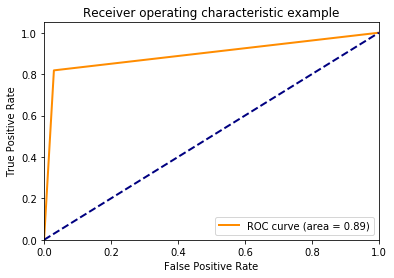

In [85]:
import matplotlib.pyplot as plt
from itertools import cycle
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [86]:
#Precision-Recall curve indicates the corresponding Precision and Recall on the coordinate axis
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.69


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.69')

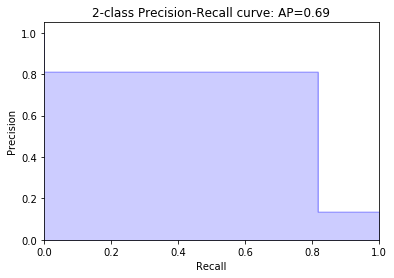

In [87]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))